I'm going to keep it short this week, been studying a lot lately (you may see more deep learning and explainable AI posts from me in the future). Anyway, let's dive:

I realized contour plots in my previous post ([here](https://yigitasik.github.io/posts/Bayesian%20Way%20-%20Predictions%20out%20of%20Posterior%20Distribution/)) look extremely bad: 
- There are no labels annotating the contour lines
- No colorbar
- No fill between contour lines

So, let's try to make them better. Before we move on, 2 things:
1. If you are not familiar with what contour plots are, Grant Sanderson ([3blue1brown](https://www.3blue1brown.com/)) has a great video on Khan Academy that explains what they are: You can watch it [here](https://youtu.be/WsZj5Rb6do8?si=Y5Jg3uSjP096bw9g). It allows you to plot 2-D functions ($f(x, y)$)
2. I'm going to skip to the plotting, not showing processes up to that point. If you want to follow along, you can find the previous steps [here](https://yigitasik.github.io/posts/Bayesian%20Way%20-%20Predictions%20out%20of%20Posterior%20Distribution/).

In [17]:
data = df_likeli.unstack()
data.iloc[:5, :5].head()

,-1.400000,-1.393636,-1.387273,-1.380909,-1.374545
-1.200000,4.812632e-15,5.218338e-15,5.654017e-15,6.121460e-15,6.622520e-15
-1.192857,5.117237e-15,5.550729e-15,6.016454e-15,6.516356e-15,7.052453e-15
-1.185714,5.437699e-15,5.900567e-15,6.398073e-15,6.932326e-15,7.505517e-15
-1.178571,5.774592e-15,6.268495e-15,6.799591e-15,7.370167e-15,7.982601e-15
-1.171429,6.128495e-15,6.655158e-15,7.221728e-15,7.830684e-15,8.484602e-15


This was the joint likelihood from the post that I have mentioned above, and here's the ugly contour plot:

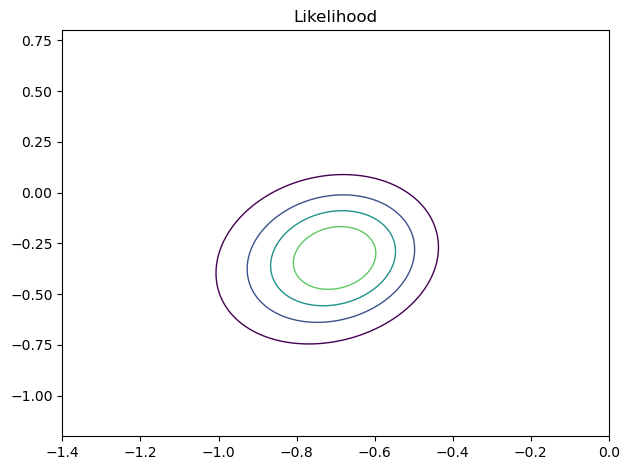

In [18]:
ut.plot_contour(df_likeli.unstack())
ut.decorate(title = 'Likelihood')

Let's start by being more explicit. I'll use matplotlib's `contour` for plotting. I provide variables (in this case, column values and indices were corresponding to our model's parameter spaces), data itself in 2D form, number of lines, and a color map.

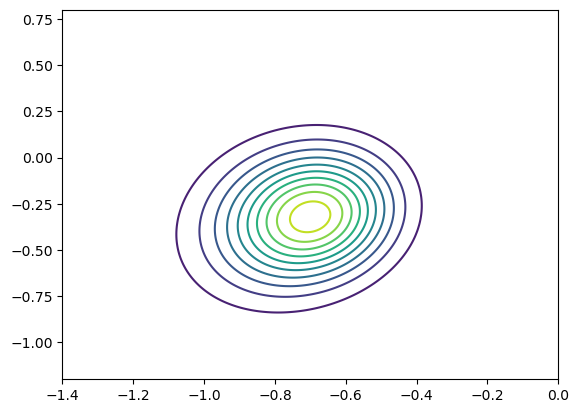

In [19]:
plt.contour(data.columns, data.index, data, 10, cmap='viridis')

This looks very similar to our ugly version, lots of information get lost in this one. Let's play with it, starting by using `contourf` instead of `contour` which fills the spaces in between.

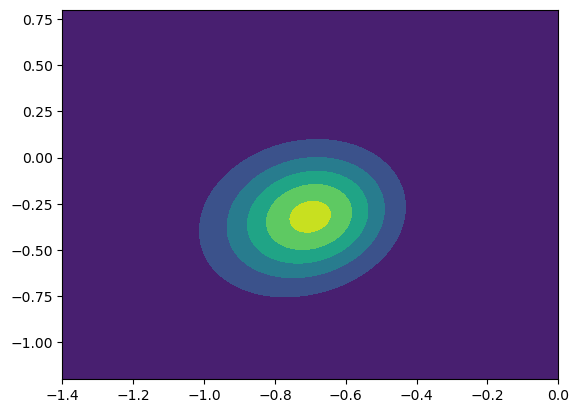

In [20]:
plt.contourf(data.columns, data.index, data, 6)

Now, this was a step forward. However, we have no idea what those colors correspond to.

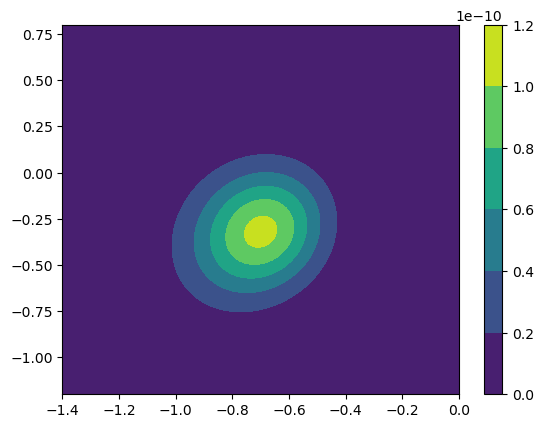

In [22]:
plt.contourf(data.columns, data.index, data, 6)
plt.colorbar()

This looks better but is there more room to improve? I don't like this discreteness between contours, want more of a smooth transition. `imshow` allows for such transition, but you need to provide extent since the function does not take x and y as inputs. Also, you need to specify the origin because the default origin is top left.

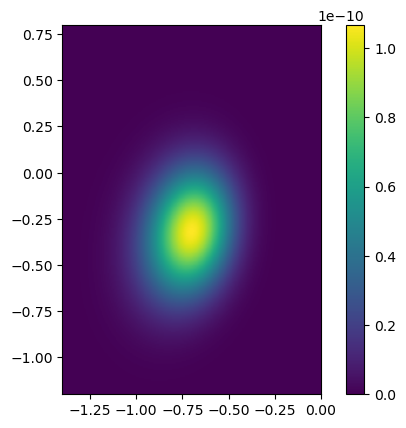

In [23]:
plt.imshow(data, extent=[data.columns.min(), data.columns.max(), data.index.min(), data.index.max()], origin='lower',
cmap='viridis')
plt.colorbar()

This definitely looks better, but one last touch: Adding contour lines with labels (`clabel`).

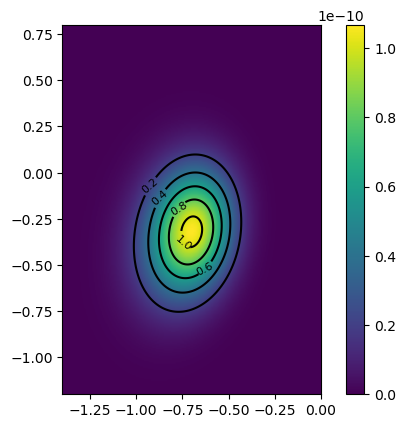

In [24]:
contours = plt.contour(data.columns, data.index, data, 6, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(data, extent=[data.columns.min(), data.columns.max(), data.index.min(), data.index.max()], origin='lower',
cmap='viridis', alpha=1)

plt.colorbar()

That's a quick guide to make your contour plots better. Hope you enjoyed it. If you did and want more, you may want to take a look at [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas. I learned some tricks from it.

Have a nice weekend!